In [ ]:
#http://seaborn.pydata.org

In [16]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from pandas import DataFrame, Series

#### 1. plot

In [6]:
ts = Series(np.random.randn(1000),
           index=pd.date_range('1/1/2000', periods=1000)) #기본값은 day이다.
ts

2000-01-01   -0.614063
2000-01-02    0.203619
2000-01-03   -0.141938
2000-01-04    0.707990
2000-01-05   -0.249424
                ...   
2002-09-22    1.907665
2002-09-23   -0.412143
2002-09-24    0.248229
2002-09-25    1.281922
2002-09-26    0.607074
Freq: D, Length: 1000, dtype: float64

<AxesSubplot:>

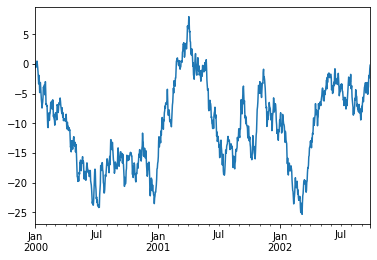

In [9]:
ts = ts.cumsum()
ts.plot()

<AxesSubplot:>

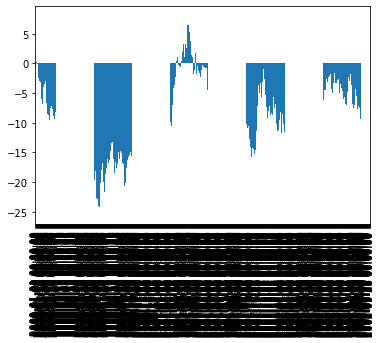

In [10]:
ts.plot(kind='bar') #시간이 한참 걸린다.

In [13]:
x = np.linspace(0, 14, 100) #0부터 14까지의 값을 100간격으로 쪼개서 만들어라
x
y = np.sin(x)
y

array([ 0.        ,  0.14094328,  0.27907268,  0.41163048,  0.53597023,
        0.64960951,  0.75027957,  0.83597055,  0.90497167,  0.95590534,
        0.98775469,  0.99988386,  0.99205069,  0.96441158,  0.91751832,
        0.85230712,  0.7700799 ,  0.67247831,  0.56145091,  0.43921435,
        0.30820902,  0.1710504 ,  0.03047682, -0.11070522, -0.24967706,
       -0.38366419, -0.5099916 , -0.6261372 , -0.72978219, -0.81885732,
       -0.89158426, -0.94651102, -0.98254101, -0.99895492, -0.99542503,
       -0.97202182, -0.92921254, -0.86785185, -0.78916479, -0.69472233,
       -0.58640998, -0.46639016, -0.33705902, -0.20099861, -0.06092533,
        0.0803643 ,  0.22004948,  0.35534146,  0.48353916,  0.60208317,
        0.7086068 ,  0.80098333,  0.87736852,  0.93623734,  0.9764145 ,
        0.99709789,  0.99787456,  0.97872901,  0.94004348,  0.8825903 ,
        0.8075165 ,  0.71632092,  0.61082424,  0.49313267,  0.36559587,
        0.23076008,  0.09131724, -0.04994872, -0.19021747, -0.32

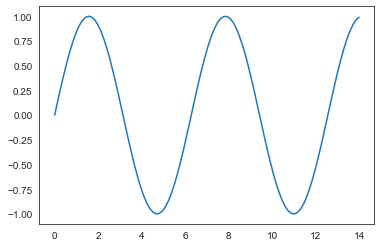

In [17]:
sns.set_style('white')
plt.plot(x,y)
plt.show()

#### 2. BoxPlot

In [40]:
#0부터 100까지의 숫자 총 101개를 만든다.
xs = np.array(np.linspace(start=0,stop=100,num=101))
xs

df = DataFrame(xs, columns=['features'])
df

,features
0,0.0
1,1.0
2,2.0
3,3.0
4,4.0
...,...
96,96.0
97,97.0
98,98.0
99,99.0


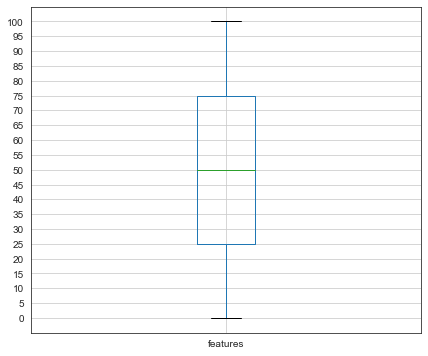

In [27]:
#위의 데이터프레임을 BoxPlat으로 나타내 보겠다. boxplot()
#boxplot은 터무니 없는 데이터는 이상치 데이터로 표시되며 중간값을 계산할때 제외함.
#4분위로 나우어 표시
#boxplot에서 중간의 선은 평균이 아니라 중간값임.
#박스 모양은 중앙값을 기준으로 상위, 하위, 25%에 해당하는 값을 의미
#박스 이외의 값은 상위, 하위 25%의 값을 의미

plt.figure(figsize=(7,6)) #그래프 사이즈 지정
df.boxplot(column=['features'])

plt.yticks(np.arange(0, 101,step=5)) #y축의 간격을 세밀하게 조정
plt.show()


#### 실전 데이터 응용

In [29]:
tips = sns.load_dataset('tips')
tips.head(1)

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2


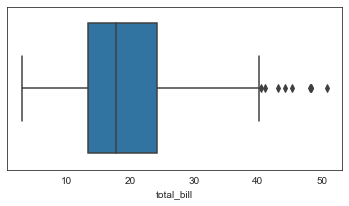

In [31]:
# boxplot()을 사용...음식지출액의 중간값과 이상치값
plt.figure(figsize=(6,3))
sns.boxplot(x=tips['total_bill'])
plt.show()

In [32]:
tips.sort_values(by='total_bill', ascending=False)

,total_bill,tip,sex,smoker,day,time,size
170,50.81,10.00,Male,Yes,Sat,Dinner,3
212,48.33,9.00,Male,No,Sat,Dinner,4
59,48.27,6.73,Male,No,Sat,Dinner,4
156,48.17,5.00,Male,No,Sun,Dinner,6
182,45.35,3.50,Male,Yes,Sun,Dinner,3
...,...,...,...,...,...,...,...
149,7.51,2.00,Male,No,Thur,Lunch,2
111,7.25,1.00,Female,No,Sat,Dinner,1
172,7.25,5.15,Male,Yes,Sun,Dinner,2
92,5.75,1.00,Female,Yes,Fri,Dinner,2


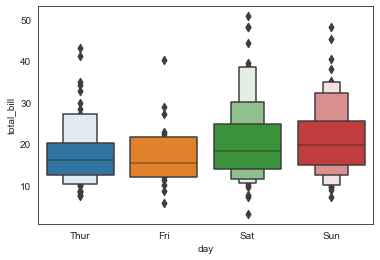

In [34]:
#이번에는 날짜별로 음식지출액을 살펴보겠다.

sns.boxenplot(x='day', y='total_bill', data=tips)
plt.show()

<AxesSubplot:xlabel='day', ylabel='total_bill'>

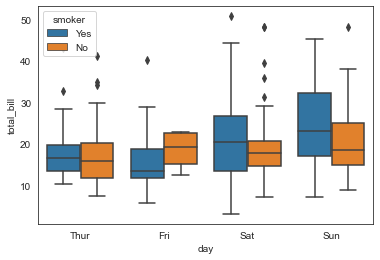

In [37]:
'''
hue : 서로 비교해서 살펴볼 대상이 있을 때 사용.
색상으로 대조해서 나타난다.

요일별, 흡연/비흡연자들의 전체 total_bill을 알 수 있는 그래프

'''

sns.boxplot(x='day', y='total_bill', hue='smoker', data=tips)

<AxesSubplot:xlabel='day', ylabel='tip'>

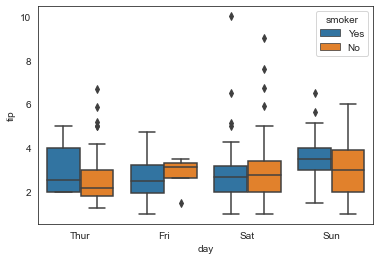

In [38]:
sns.boxplot(x='day', y='tip', hue='smoker', data=tips)

#### 3.lmplot

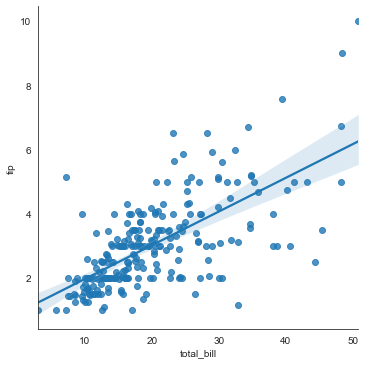

In [42]:
sns.lmplot(x='total_bill', y='tip', data=tips)
plt.show()

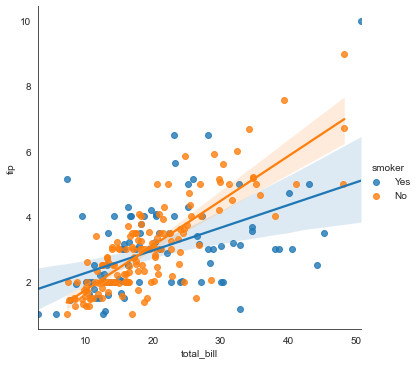

In [43]:
#팁을 더 많이 주는 사람은 비흡연자라는 결론이 나온다
#선의 의미는 명확
#쉐도우의 의미
sns.lmplot(x='total_bill', y='tip', hue='smoker', data=tips)

#### 4. Heatmap

In [45]:
#년도별 월별 비행기 탑승객수
flights = sns.load_dataset('flights')
flights.head(3)

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132


In [50]:
flights = flights.pivot_table(index='month', columns='year', values='passengers')
flights.head(3)

year,1949,1950,1951,1952,1953,1954,1955,1956,1957,1958,1959,1960
month,,,,,,,,,,,,
Jan,112,115,145,171,196,204,242,284,315,340,360,417
Feb,118,126,150,180,196,188,233,277,301,318,342,391
Mar,132,141,178,193,236,235,267,317,356,362,406,419


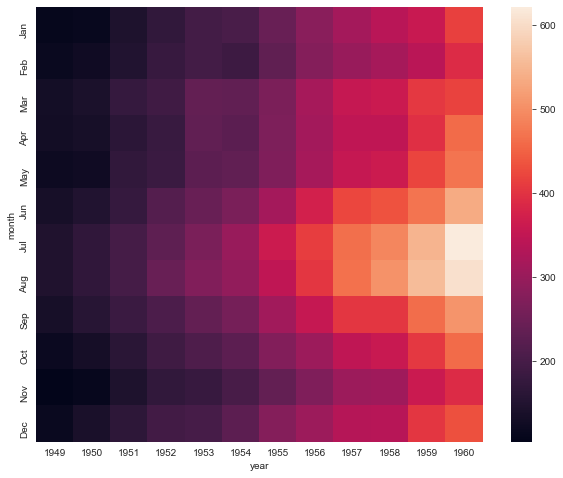

In [51]:
plt.figure(figsize=(10, 8))
sns.heatmap(flights)
plt.show()

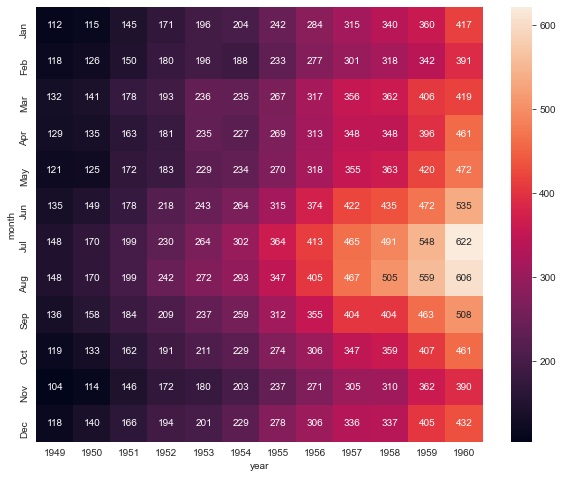

In [52]:
plt.figure(figsize=(10, 8))
sns.heatmap(flights, annot=True, fmt='d') #formating을 데시벌.. 정수값이 표시됨
plt.show()